# Churn Prediction
In this project, we will try to predict **churn** of customer in a certain telco company. The data is from <a href="https://www.kaggle.com/datasets/blastchar/telco-customer-churn">Kaggle</a>. And here is an explanation about the data we will be using:

<ol>
    <li>Each row represents a customer, each column contains customer's attributes described on the column Metadata</li>
    <li>The data set includes information about:</li>
    <ul>
        <li>Customers who left within the last month - the column is called Churn</li>
        <li>Services that each customer has signed up for - phone, multiple lines, internet, online security, online
            backup, device protection, tech support, and streaming TV and movies.</li>
        <li>Demographic info about customers - gender, age range, and if they have partners and dependents</li>
    </ul>
</ol>
        

<table>

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents

### Data Overview

<table>
    <thead>
        <th>Column</th>
        <th>Description</th>
    </thead>
    <tbody>
        <tr>
            <td>customerID</td>
            <td>Customer ID</td>
        </tr>
        <tr>
            <td>gender</td>
            <td>Whether the customer is a male or a female</td>
        </tr>
        <tr>
            <td>SeniorCitizen</td>
            <td>Whether the customer is a senior citizen or not (1,0)</td>
        </tr>
        <tr>
            <td>Partner</td>
            <td>Whether the customer has a partner or not (Yes, No)</td>
        </tr>
        <tr>
            <td>Dependents</td>
            <td>Whether the customer has dependents or not (Yes, No)</td>
        </tr>
        <tr>
            <td>tenure</td>
            <td>Number of months the customer has stayed with the company</td>
        </tr>
        <tr>
            <td>PhoneService</td>
            <td>Whether the customer has a phone service or not (Yes, No)</td>
        </tr>
        <tr>
            <td>MultipleLines</td>
            <td>Whether the customer has multiple lines or not (Yes, No, No phone service)</td>
        </tr>
        <tr>
            <td>InternetService</td>
            <td>Customer's internet service provider (DSL, Fiber optic, No)</td>
        </tr>
        <tr>
            <td>OnlineSecurity</td>
            <td>Whether the customer has online security or not (Yes, No, No internet service)</td>
        </tr>
        <tr>
            <td>OnlineBackup</td>
            <td>Whether the customer has online backup or not (Yes, No, No internet service)</td>
        </tr>
        <tr>
            <td>DeviceProtection</td>
            <td>Whether the customer has device protection or not (Yes, No, No internet service)</td>
        </tr>
        <tr>
            <td>TechSupport</td>
            <td>Whether the customer has tech support or not (Yes, No, No internet service)</td>
        </tr>
        <tr>
            <td>StreamingTV</td>
            <td>Whether the customer has streamingTV or not (Yes, No, No internet service)</td>
        </tr>
        <tr>
            <td>StreamingMovies</td>
            <td>Whether the customer has streaming movies or not (Yes, No, No internet service)</td>
        </tr>
        <tr>
            <td>Contract</td>
            <td>The contract term of the customer (Month-to-month, One year, Two year)</td>
        </tr>
        <tr>
            <td>PaperlessBilling</td>
            <td>Whether the customer has paperless billing or not (Yes, No)</td>
        </tr>
        <tr>
            <td>PaymentMethod</td>
            <td>The customer's payment methid (Electronic check, Mailed check, Bank transfer (automatic), Credit card
                (automatic))</td>
        </tr>
        <tr>
            <td>MonthlyCharges</td>
            <td>The amount charged to the customer monthly</td>
        </tr>
        <tr>
            <td>TotalCharges</td>
            <td>The total amount charges to the customer</td>
        </tr>
        <tr>
            <td>Churn</td>
            <td>Whether the customer churned or not (Yes or No)</td>
        </tr>
    </tbody>
</table>
        

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

First of all, read the dataset using pandas

In [2]:
# Read a csv file and convert it into DataFrame
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
# Show some of the rows in the DataFrame
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


---

## Exploratory Data Analysis (EDA)
Now, it's time to explore the data. The purpose of EDA is to gain insights and undestand the data characteristics, which can help to inform further analysis an model development.

---

In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


---
From our code(`data.info`) the output shows us that there are no null values which is a rare case. In real-world data, null value is actually pretty common.

Because there are no null values, we can **skip** the part where we:
* Fill the null values

OR
* Delete rows with null values

Next, what i like to do is to see the general information of each columns in our dataset. Information such as data type, null values, null values percentage, unique data per column, and sampe of unique data.

---

In [6]:
# We will set this as a function so that we can easily see the updated value

def data_desc():
    columns=[]
    for col in df.columns:
        columns.append([col, df[col].dtypes, df.shape[0], df[col].isnull().sum(), round((df[col].isna().sum()/len(df[col])) * 100,3),
                        df[col].nunique(), list(df[col].unique())])
    desc = pd.DataFrame(data=columns, columns=['dataFeatures', 'dataType', 'dataLength', 'null', 'nullPct', 'unique', 'uniqueSample'])
    return desc
data_desc()

,dataFeatures,dataType,dataLength,null,nullPct,unique,uniqueSample
0,customerID,object,7043,0,0.0,7043,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC..."
1,gender,object,7043,0,0.0,2,"[Female, Male]"
2,SeniorCitizen,int64,7043,0,0.0,2,"[0, 1]"
3,Partner,object,7043,0,0.0,2,"[Yes, No]"
4,Dependents,object,7043,0,0.0,2,"[No, Yes]"
5,tenure,int64,7043,0,0.0,73,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ..."
6,PhoneService,object,7043,0,0.0,2,"[No, Yes]"
7,MultipleLines,object,7043,0,0.0,3,"[No phone service, No, Yes]"
8,InternetService,object,7043,0,0.0,3,"[DSL, Fiber optic, No]"
9,OnlineSecurity,object,7043,0,0.0,3,"[No, Yes, No internet service]"


---

From table above, if you analyze it one by one, you  will see that there are something strange. That something is in `Total Charges` column. This column has 6000+ unique values, and in the unique sample you can clearly see that it is in form of numbers. But this column has a datatype of object (not float or integer). We can set this as our fist task:

* **Change DataType of `TotalCharges` column from object to float**

To change data type to float, we can use either `pd.to_numeric(df)` or `df.astype('float')`. Both are from pandas library. For our case here, i will use `pd.to_numeric` for no specific reason

---

In [7]:
# Here, we set the value of "errors" parameter to "coerce"
# We do this to set the value to NaN if there are any invalid parsing (errors)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Let's check the dataset
data_desc()

,dataFeatures,dataType,dataLength,null,nullPct,unique,uniqueSample
0,customerID,object,7043,0,0.000,7043,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC..."
1,gender,object,7043,0,0.000,2,"[Female, Male]"
2,SeniorCitizen,int64,7043,0,0.000,2,"[0, 1]"
3,Partner,object,7043,0,0.000,2,"[Yes, No]"
4,Dependents,object,7043,0,0.000,2,"[No, Yes]"
5,tenure,int64,7043,0,0.000,73,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ..."
6,PhoneService,object,7043,0,0.000,2,"[No, Yes]"
7,MultipleLines,object,7043,0,0.000,3,"[No phone service, No, Yes]"
8,InternetService,object,7043,0,0.000,3,"[DSL, Fiber optic, No]"
9,OnlineSecurity,object,7043,0,0.000,3,"[No, Yes, No internet service]"


In [8]:
sum(df['TotalCharges'].isna())

11

---

From the updated table above we can see that the successfully change the data type. But now, there are null values in our dataset. That is weird, in our previous data, there were no null values. Why is there a null value now?

To answer this question, i have to dig a little deeper. It turns out from the start, there are null values. Its just it is not stored as a literal null. But it is stored as a **string of whitespace** (`' '`)> Meanwhile the condition for a value to be declared as null is have a value of `NaN`

Now, the next thing we need to think is **How to deal with null values**. As I stated above, there are two ways to deal with null values. **First** is to replace values with other values, it can be simple as a mean or as complex as using *machine learning* to find the suitable value. **Second**, is just to remove the null value. From the table above, we know that there are only 11 null values or about 0,15% of the total data. So it's best to just **remove the null values** as it doesn't have any significant impact to our dataset.

To remove null values we can use `.dropna()` from pandas then specify the column we want to reference.

---

In [9]:
# Using .dropna() to remove null values
# subset parameter is to reference the column we want.
# inplace = True is to declare that we are modifying our original dataset
df.dropna(axis=0, subset=['TotalCharges'], inplace=True)

# Checking the dataset if there still null values
sum(df['TotalCharges'].isna())

0

---

### Data Visualization
Now, there are no null values left in our data. The next step is to visualize our data to find insights or pattern of our data. This step is **not necessary** when building a machine learning model, but it can be very useful to improve our understanding of the dataset.

---

In [10]:
df[['MonthlyCharges','TotalCharges']]

,MonthlyCharges,TotalCharges
0,29.85,29.85
1,56.95,1889.50
2,53.85,108.15
3,42.30,1840.75
4,70.70,151.65
...,...,...
7038,84.80,1990.50
7039,103.20,7362.90
7040,29.60,346.45
7041,74.40,306.60


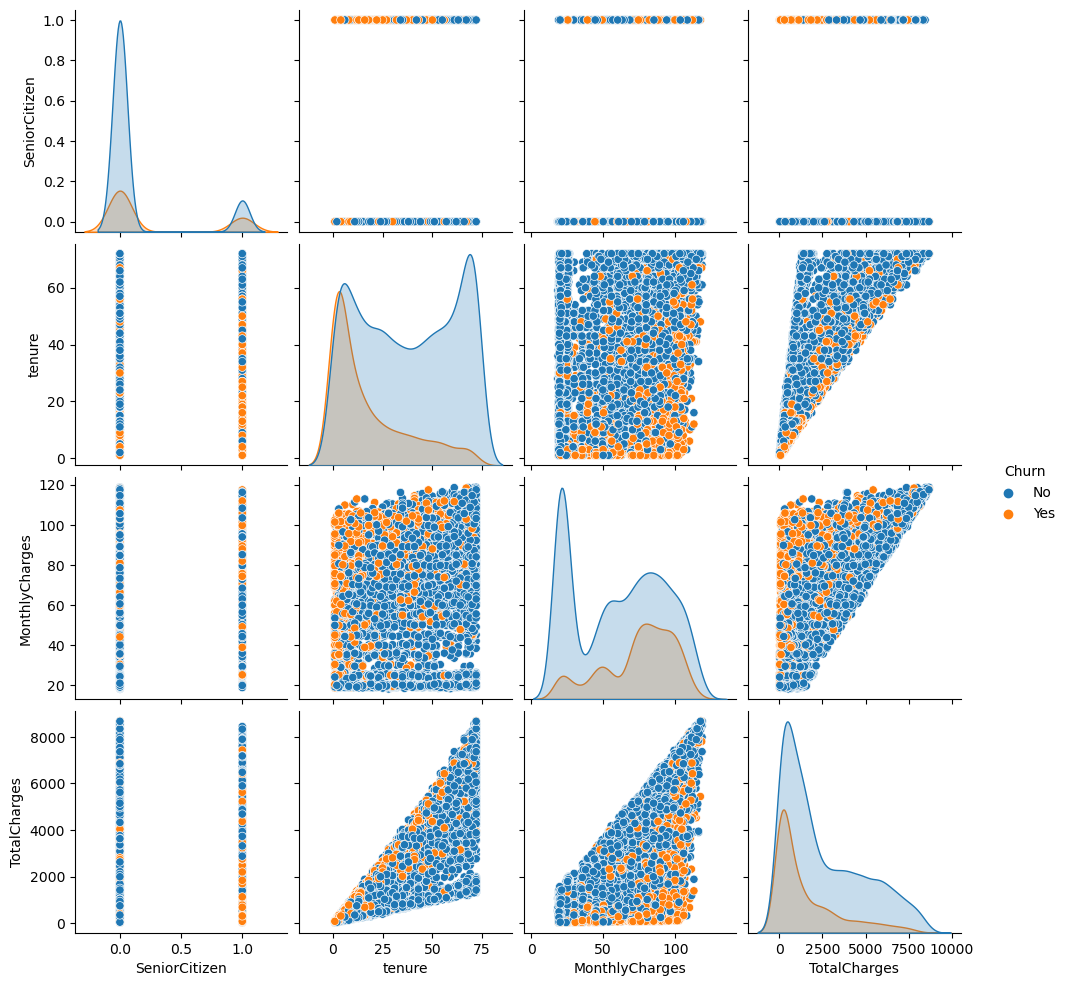

In [11]:
sns.pairplot(df, hue='Churn')

From the plot above, we can see a certain pattern in `TotalCharges` column. Both in `MonthlyCharges` and `tenure` row, low value of both dont have any high value of `TotalCharges`. This is quite obvious considering both of feature are **directly correlated** to `TotalCharges` (if you read the provided *Data Overview*).

---

<AxesSubplot: xlabel='TotalCharges', ylabel='Count'>

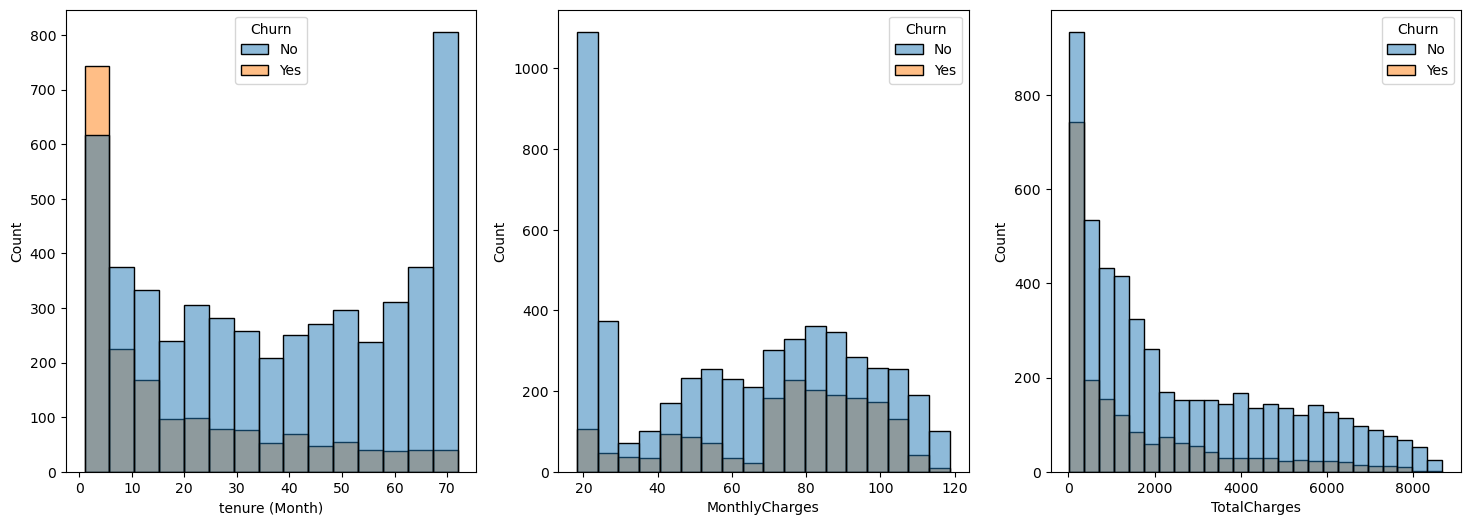

In [12]:
fig, ax = plt.subplots(1,3, figsize=(18,6))
sns.histplot(data=df, x='tenure', hue='Churn', ax=ax[0])
ax[0].set_xlabel('tenure (Month)')
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', ax=ax[1],)
sns.histplot(data=df, x='TotalCharges', hue='Churn', ax=ax[2])

---

From `tenure` visualization, we can see that the percentage of customers who churned is very high in the first year of using company service. The longer a customer uses a company's service, the less likely it is that the customer will churn. The `TotalCharge` visualization also show the same as it is directly correlated to `tenure`. From the `MonthlyCharges` we can see that the percentage of customer is lowest when a customer get charged less than ~30.

---

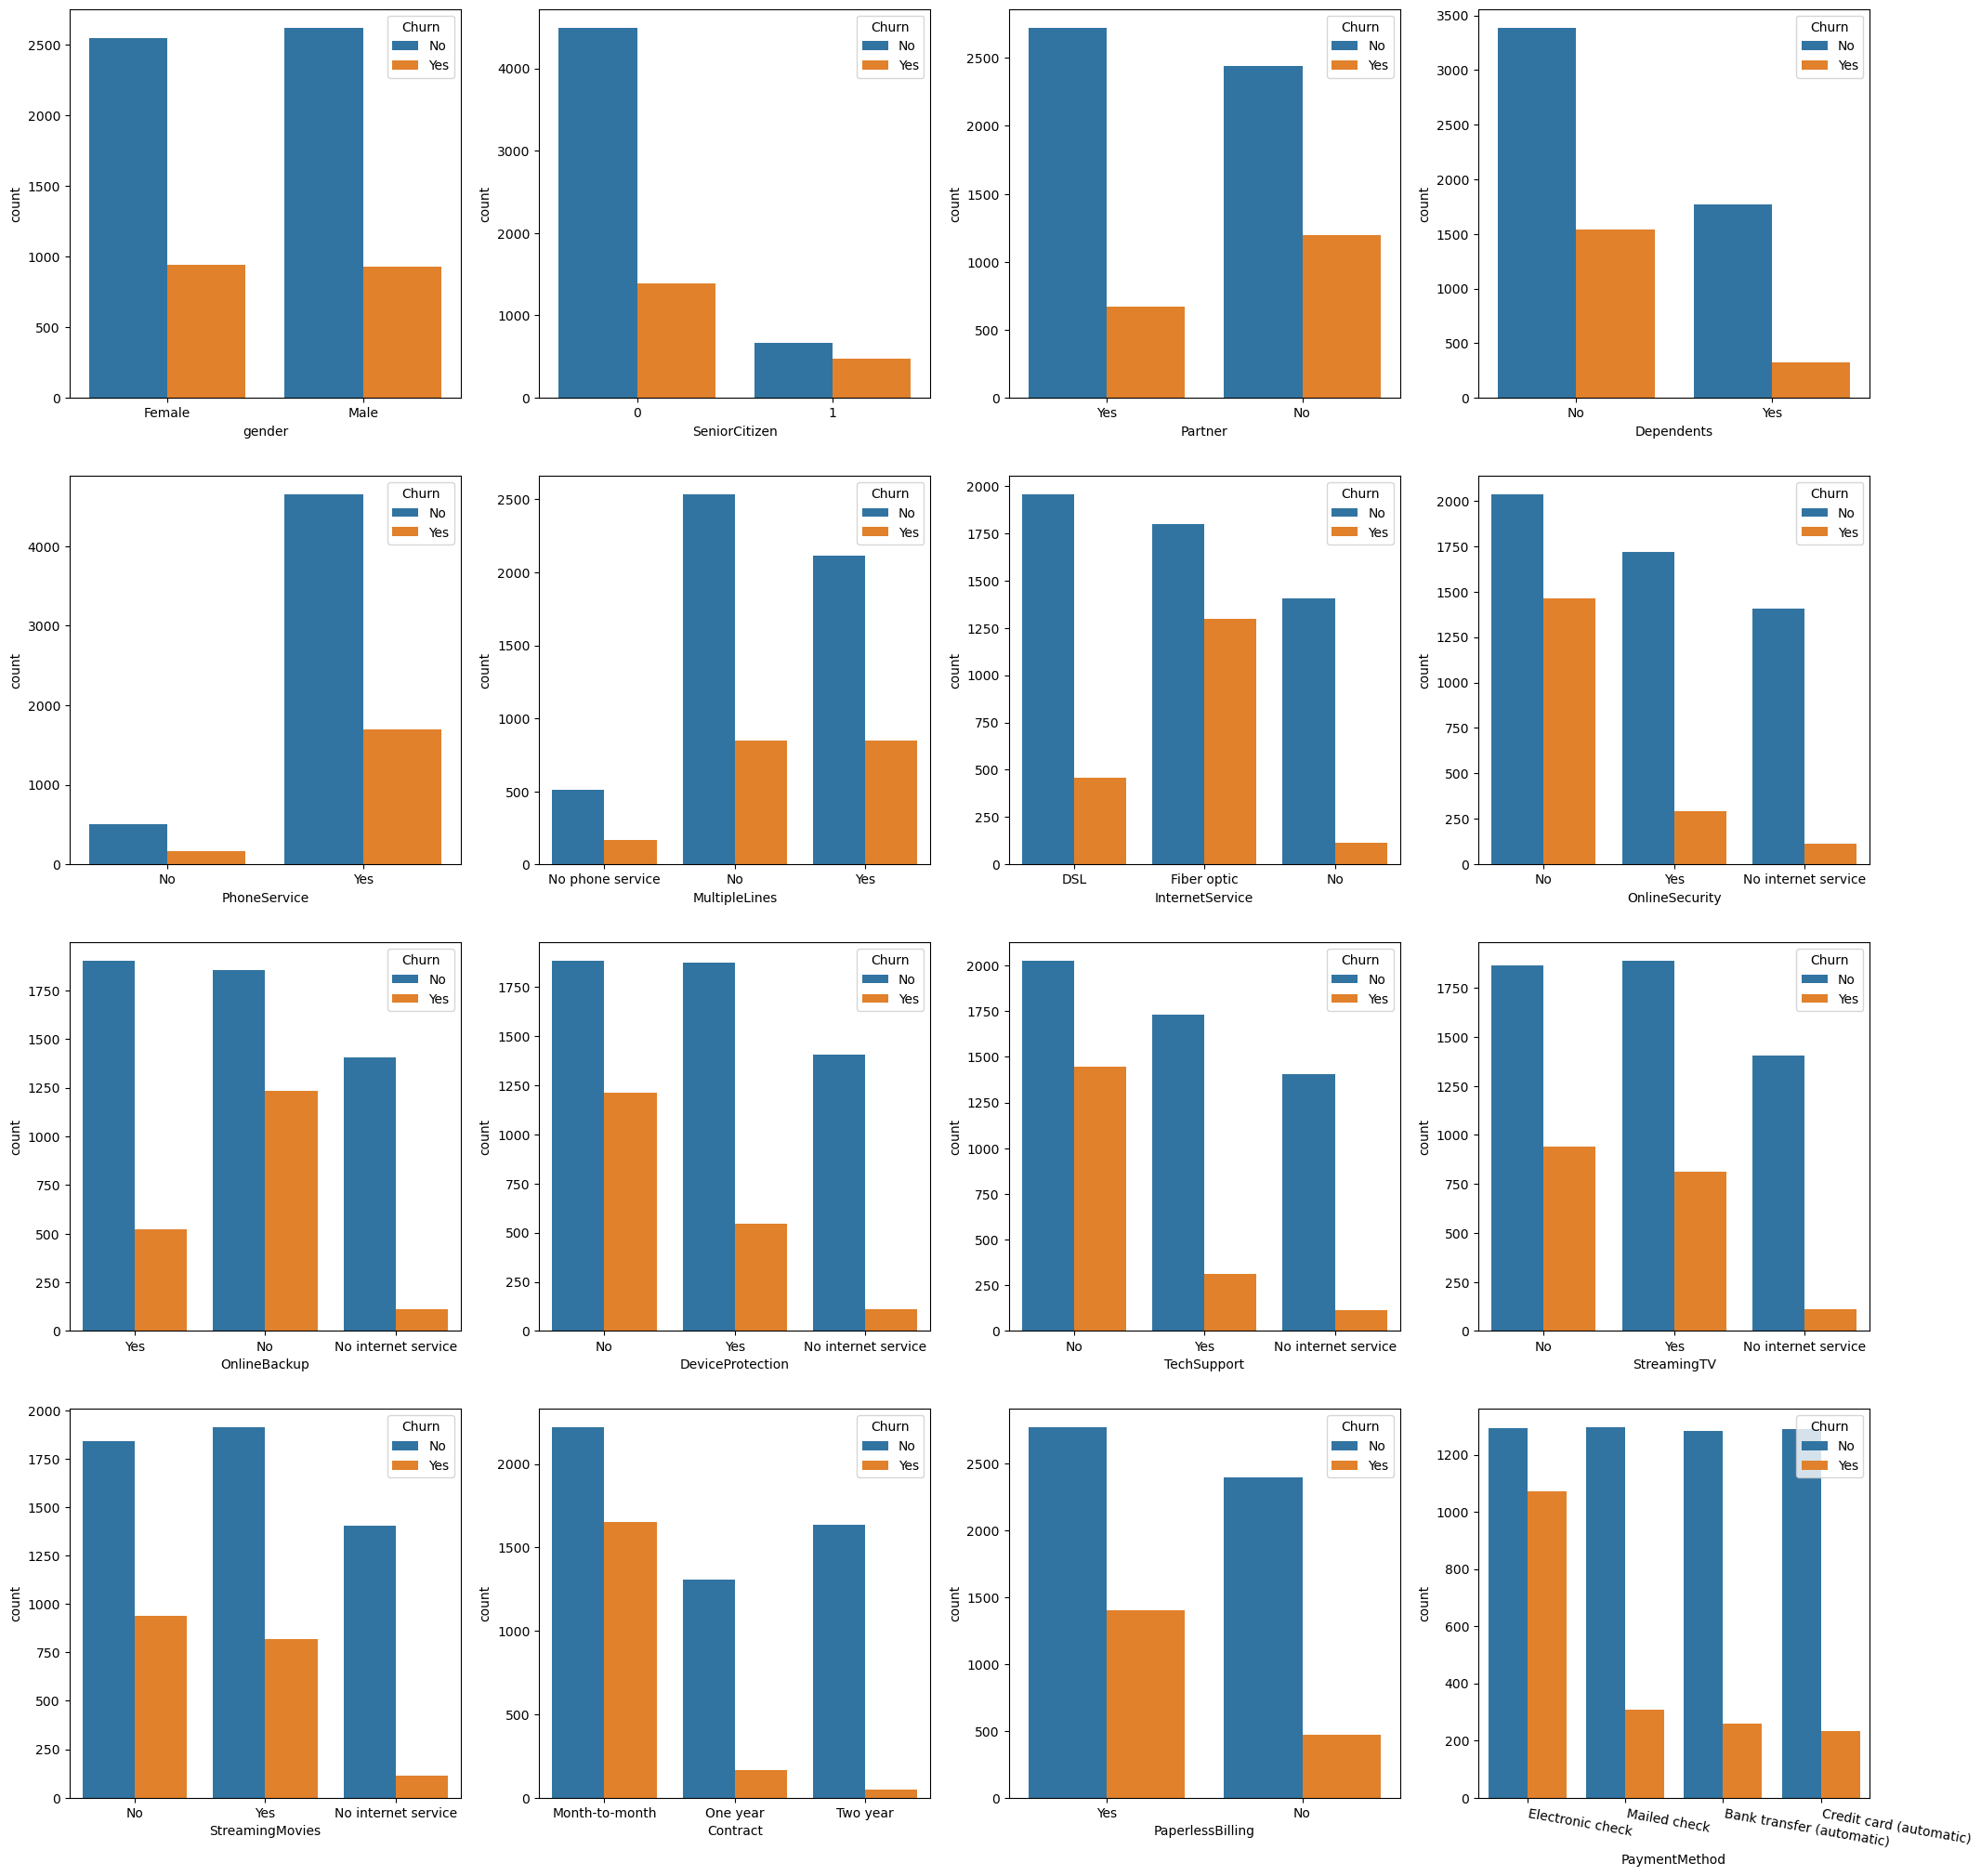

In [13]:
# First thing to do is to select the columns we want
cols = list(df.select_dtypes(include= ['object']).columns)
cols.remove('customerID')
cols.remove('Churn')
cols.insert(1, 'SeniorCitizen')
cols

# Next is to plot all of it inside one figure (Not recommended, but its my personal preference)
fig, ax = plt.subplots(4, 4, figsize=(25,25))

for num,col in enumerate(cols):
    sns.countplot(data=df, x=col, hue='Churn', ax=ax[num//4,num%4])
    if col == 'PaymentMethod':
        plt.xticks(rotation=350, ha='left')

<AxesSubplot: >

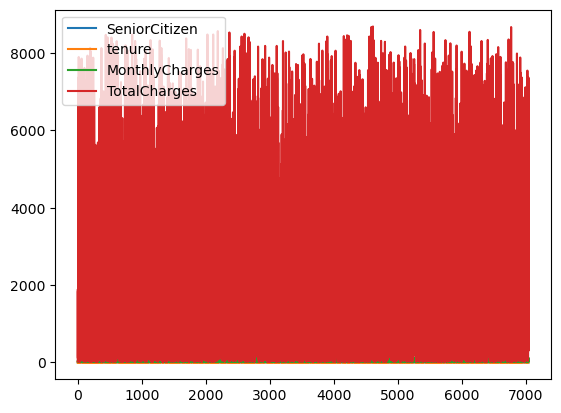

In [34]:
df.plot('C')

<AxesSubplot: >

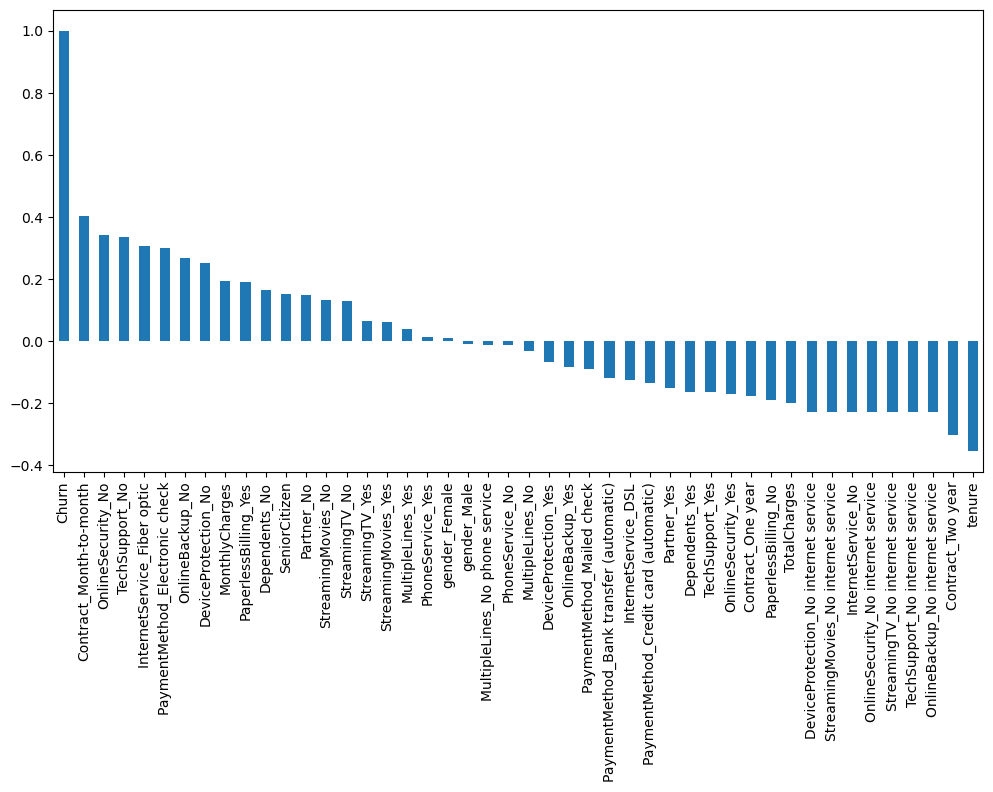

In [57]:
df2 = df.iloc[:,1:]
df2['Churn'] =  df['Churn'].map({'Yes': 1, 'No': 0})
df_dummies = pd.get_dummies(df2)
plt.figure(figsize = (12,6))
df_dummies.corr().loc['Churn'].sort_values(ascending=False).plot(kind='bar')

---

There are too much to say about above categorical visualization so i will skip the explanation on this part. Though i want to point out that from the plot above, none of the features appear to be necessary to remove, as all of the features show a **visible difference** between churned and non-churned customers.

---

## Data Preprocessing and Feature Selection/Engineering

We finished our data visualization. The next step is **Data Processing** where we clean, transform, and possibly reformat our data. There are two main purpose of this step. The **first** is to improve the quality of our data, and the **second** is to ensure that our data can be properly understood by machine learing algorithms.

In this section, we will also performing **Feature Selection/Engineering** which involves selecting or removing features, or possibly creating new features from existing ones, with the goal of improving our machine learning model.

---

In [14]:
# Lets take a look at our data
data_desc()

,dataFeatures,dataType,dataLength,null,nullPct,unique,uniqueSample
0,customerID,object,7032,0,0.0,7032,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC..."
1,gender,object,7032,0,0.0,2,"[Female, Male]"
2,SeniorCitizen,int64,7032,0,0.0,2,"[0, 1]"
3,Partner,object,7032,0,0.0,2,"[Yes, No]"
4,Dependents,object,7032,0,0.0,2,"[No, Yes]"
5,tenure,int64,7032,0,0.0,72,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ..."
6,PhoneService,object,7032,0,0.0,2,"[No, Yes]"
7,MultipleLines,object,7032,0,0.0,3,"[No phone service, No, Yes]"
8,InternetService,object,7032,0,0.0,3,"[DSL, Fiber optic, No]"
9,OnlineSecurity,object,7032,0,0.0,3,"[No, Yes, No internet service]"


---

#### Removing Feature
The first thing we can do is remove `customerID` column. This column is similar to the index column, as it is only there to identify each customer by their unique ID. Therefore, it **cannot be used to predict** whether a customer will churn or not.

---

In [15]:
# axis=1 is used to drop column(s)
df.drop('customerID', axis=1, inplace=True )

---

#### Converting Categorical Data
Before we continue, it's important to note that machine learning algorithms, at least in the case of sklearn, typically require **input data to be in numerical format**. This means that we should convert any categorical data (object data type) into its numerical form. For categorical data with only two unique values, we can use **0 and 1** to represent each unique value. However, for data with more than two unique values, it becomes a bit more complicated. There are many techniques we can use to convert categorical data with multiple values. In this project, I will use both **Label Encoding** and **One-Hot Encoding**. Label encoding is used for features that have inherent encoding, whereas One-Hot Encoding is used when there is no inherent ordering and when there aren't too many unique values.

---

In [16]:
# Converting categorical data with only two unique values
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})
df['Partner'] = df['Partner'].map({'No': 0, 'Yes': 1})
df['Dependents'] = df['Dependents'].map({'No': 0, 'Yes': 1})
df['PhoneService'] = df['PhoneService'].map({'No': 0, 'Yes': 1})
df['PaperlessBilling'] = df['PaperlessBilling'].map({'No': 0, 'Yes': 1})
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

In [17]:
# Label encoding to categorical data that have inherent ordering
df['MultipleLines'] = df['MultipleLines'].map({'No phone service': 0, 'No': 1, 'Yes': 2})
maps = {'No internet service': 0, 'No': 1, 'Yes': 2}
cols = df.columns[8:14]
for col in cols:
    df[col] = df[col].map(maps)
df['Contract'] = df['Contract'].map({'Month-to-month': 0, 'One year': 1, 'Two year': 2})

In [18]:
# One Hot Encoding to the remaining categorical data
# Drop first is used to drop the first level of categorical value
internet_dummy = pd.get_dummies(df['InternetService'], drop_first=True, prefix='internet_')
payment_dummy = pd.get_dummies(df['PaymentMethod'], drop_first=True, prefix='payMethod_')

# Add new column to the dataset and drop the previous columns
df = pd.concat([df.drop(['InternetService', 'PaymentMethod'], axis=1), internet_dummy, payment_dummy], axis=1)

# Order the dataframe so that our target column (Churn) is at the last column
col_order = list(df.columns)
col_order.remove('Churn')
col_order.append('Churn')
print(col_order)
df = df[col_order]

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'internet__Fiber optic', 'internet__No', 'payMethod__Credit card (automatic)', 'payMethod__Electronic check', 'payMethod__Mailed check', 'Churn']


In [19]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,internet__Fiber optic,internet__No,payMethod__Credit card (automatic),payMethod__Electronic check,payMethod__Mailed check,Churn
0,0,0,1,0,1,0,0,1,2,1,...,0,1,29.85,29.85,0,0,0,1,0,0
1,1,0,0,0,34,1,1,2,1,2,...,1,0,56.95,1889.50,0,0,0,0,1,0
2,1,0,0,0,2,1,1,2,2,1,...,0,1,53.85,108.15,0,0,0,0,1,1
3,1,0,0,0,45,0,0,2,1,2,...,1,0,42.30,1840.75,0,0,0,0,0,0
4,0,0,0,0,2,1,1,1,1,1,...,0,1,70.70,151.65,1,0,0,1,0,1


---

## Model Building
Now, our data is ready for training our Machine Learning Model. The next step is building a machine learning model. 

---

In [80]:
# Import all module we want to use
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import RocCurveDisplay
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron, RidgeClassifier, PassiveAggressiveClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis

In [83]:
# Split the data to "input data" and "target"
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)

In [86]:
y_train

5298    0
2654    1
3717    0
6335    0
4265    1
       ..
600     0
5704    0
1366    1
1552    0
4967    1
Name: Churn, Length: 5274, dtype: int64

In [89]:
lr = LogisticRegression(max_iter = 1000)
sgd = SGDClassifier()
pcn = Perceptron()
rc = RidgeClassifier()
pac = PassiveAggressiveClassifier()
dtree = DecisionTreeClassifier()
rfc = RandomForestClassifier()
gb = GradientBoostingClassifier()
ab = AdaBoostClassifier()
svc = SVC()
knn = KNeighborsClassifier()
gnb = GaussianNB()
mnb = MultinomialNB()
mlp = MLPClassifier()
qda = QuadraticDiscriminantAnalysis()
lda = LinearDiscriminantAnalysis()

In [ ]:
cross_val_score

In [40]:
li = [lr, sgd, pcn, rc, pac, dtree, rfc, gb, ab, svc, knn, gnb, mnb, mlp, qda, lda]

In [77]:
name = str(li)
name = name.replace(']', '')
name = name.replace('()', '')
name = name.replace('[', '')
name = name.split(', ')

In [92]:
cross_validate(lr, X, y, cv=4, scoring=['accuracy', 'precision', 'recall', 'f1'])

{'fit_time': array([0.04323888, 0.0208497 , 0.02859712, 0.03883529]),
 'score_time': array([0.00555086, 0.0049994 , 0.00558472, 0.00551462]),
 'test_accuracy': array([0.8105802 , 0.79067122, 0.79749716, 0.80261661]),
 'test_precision': array([0.67631579, 0.63711911, 0.63771712, 0.66666667]),
 'test_recall': array([0.5503212 , 0.49250535, 0.5503212 , 0.51709402]),
 'test_f1': array([0.6068477 , 0.55555556, 0.5908046 , 0.58243081])}

In [ ]:
p

In [94]:
scores = []
for num, tech in enumerate(li):
    scorelog = cross_val_score(tech, X, y, cv=4)
    print(f'{num+1}. Score is {scorelog} accuracy MEAN is {sum(scorelog)/(len(scorelog))}')
    

1. Score is [0.8105802  0.79067122 0.79749716 0.80261661] accuracy MEAN is 0.8003412969283276
2. Score is [0.78100114 0.44823663 0.48236633 0.78156997] accuracy MEAN is 0.6232935153583617
3. Score is [0.76052332 0.7519909  0.39761092 0.77189989] accuracy MEAN is 0.6705062571103527
4. Score is [0.81001138 0.7963595  0.79579067 0.80318544] accuracy MEAN is 0.8013367463026166
5. Score is [0.73435722 0.67690557 0.26564278 0.79749716] accuracy MEAN is 0.6186006825938566
6. Score is [0.72411832 0.73720137 0.70477816 0.72525597] accuracy MEAN is 0.7228384527872582
7. Score is [0.79522184 0.77986348 0.77076223 0.80546075] accuracy MEAN is 0.7878270762229805
8. Score is [0.81114903 0.8003413  0.7923777  0.80716724] accuracy MEAN is 0.8027588168373152
9. Score is [0.81569966 0.79863481 0.79977247 0.80773606] accuracy MEAN is 0.8054607508532423
10. Score is [0.73435722 0.73435722 0.73435722 0.7337884 ] accuracy MEAN is 0.7342150170648465
11. Score is [0.75312856 0.75938567 0.75028441 0.77474403] 

In [ ]:
solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
penalty = ['l1', 'l2', 'elasticnet', None]
for solve in solver:
    print(solve.upper())
    for pen in penalty:
        try:
            print(pen.upper())
        except AttributeError:
            print('NONE')
        try:
            log = LogisticRegression(penalty=pen, solver=solve, c=5)  
            scorelog = cross_val_score(log, X, y, cv=4, s)
            print(f'All score is {scorelog}\n with SUM: {sum(scorelog)}\n MEAN: {sum(scorelog)/len(scorelog)}')
            print('-----------------------------------------------------')

                                     
        except ValueError:
            print(f'{pen} penalty can\'t be used in {solve} solver')
            print('-------------------------------------------------')
